# Ejercicio 1

Dado los datos vistos en la tabla:

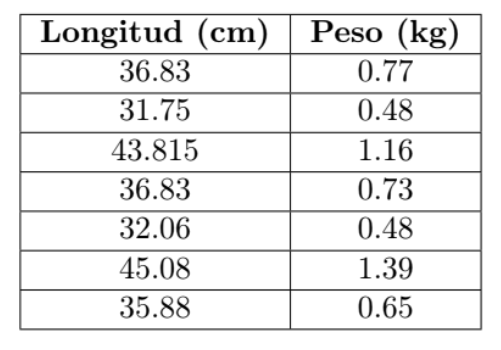

Emplearé el código de regresión lineal, de la práctica anterior, para graficar los datos originales contra la estimación que genere.

Intercepto (b_2): -1.6290317260118081
Pendiente (a_2): 0.0650659577192423


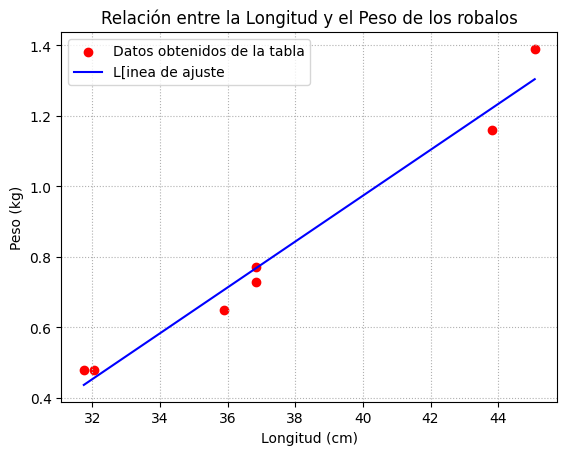

Coeficientes de correlación: 0.9871935788371415


In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Datos de la longitud y el peso de los robalos

longitudes = np.array([36.83, 31.75, 43.815, 36.83, 32.06, 45.08, 35.88])
pesos = np.array([0.77, 0.48, 1.16, 0.73, 0.48, 1.39, 0.65])

#Número de los puntos
n = len(longitudes)

#Sumas necesarias para el ajuste lineal
Suma_l = sum(longitudes)
Suma_W = sum(pesos)
Suma_ll = sum(longitudes**2)
Suma_lW = sum(longitudes * pesos)

#Cálculo de los coeficientes 'a' y 'b'
b_2 = (Suma_ll * Suma_W - Suma_lW * Suma_l) / (n*Suma_ll - Suma_l**2)
a_2 = (n * Suma_lW - Suma_l * Suma_W) / (n*Suma_ll - Suma_l**2)

print(f"Intercepto (b_2): {b_2}")
print(f"Pendiente (a_2): {a_2}")

#Creación de una línea de ajuste
x = np.linspace(min(longitudes), max(longitudes), 100)
y = b_2 + a_2 * x

#Gráfica de dispersión y línea de ajuste
plt.scatter(longitudes, pesos, color = 'r', label = 'Datos obtenidos de la tabla')
plt.plot(x, y, color = 'b', label = 'L[inea de ajuste')
plt.xlabel('Longitud (cm)')
plt.ylabel('Peso (kg)')
plt.title('Relación entre la Longitud y el Peso de los robalos')
plt.legend()
plt.grid(linestyle = 'dotted')
plt.show()

#Cálculo de la correlación
correlacion = np.corrcoef(pesos, longitudes) [0,1]
print(f"Coeficientes de correlación: {correlacion}")




Gracias a este código se logra visualizar la relación entre el peso y la longitud pero no la constante, para esto ajustaré el modelo empleando la ecuación W = K⋅l^3.

Con base en la información extraída de https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html encontré curve fit como un procesos para encontrar funciones matemáticas. 

Empleando 'scipy.optimize import curve_fit' encontraré los parámetros que minimizan la diferencia entre la función y los datos observados.


Constante K: 1.4615574744793887e-05


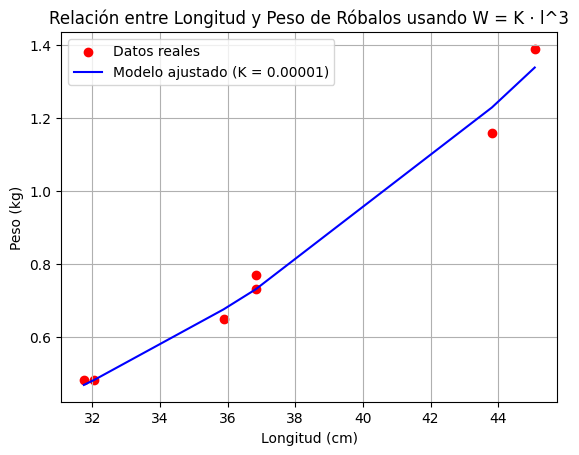

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos de la longitud (l) y el peso (W) de los róbalos
longitudes = np.array([36.83, 31.75, 43.815, 36.83, 32.06, 45.08, 35.88])
pesos = np.array([0.77, 0.48, 1.16, 0.73, 0.48, 1.39, 0.65])

# Definir la relación W = K * l^3
def modelo(l, K):
    return K * l**3

# Ajustar el modelo para encontrar K
params, _ = curve_fit(modelo, longitudes, pesos)
K_opt = params[0]

print(f"Constante K: {K_opt}")

# Predicción de pesos usando el modelo ajustado
pesos_estimados = modelo(longitudes, K_opt)

# Grafica de los datos originales y la estimación del modelo
plt.scatter(longitudes, pesos, color='r', label='Datos reales')

# Orden de los datos para una mejor visualización de la línea ajustada
sorted_indices = np.argsort(longitudes)
longitudes_sorted = longitudes[sorted_indices]
pesos_estimados_sorted = pesos_estimados[sorted_indices]

plt.plot(longitudes_sorted, pesos_estimados_sorted, color='b', label=f'Modelo ajustado (K = {K_opt:.5f})')
plt.xlabel('Longitud (cm)')
plt.ylabel('Peso (kg)')
plt.title('Relación entre Longitud y Peso de Róbalos usando W = K ⋅ l^3')
plt.legend()
plt.grid(True)
plt.show()


curve_fit(modelo, longitudes, pesos): Ajusta el modelo definido por la función modelo (l, k) a los datos.

modelo(l, k) representa la ecuación W=K⋅l^3

paras: Es un arreglo que contiene el valor óptimo del parámatro K.

En conclusión, al agregar la constante para reajustar el modelo se ve una mejora notable en el momento de predecir las relaciones entre peso y longitud, al comparar gráficamente los valores.

> Add blockquote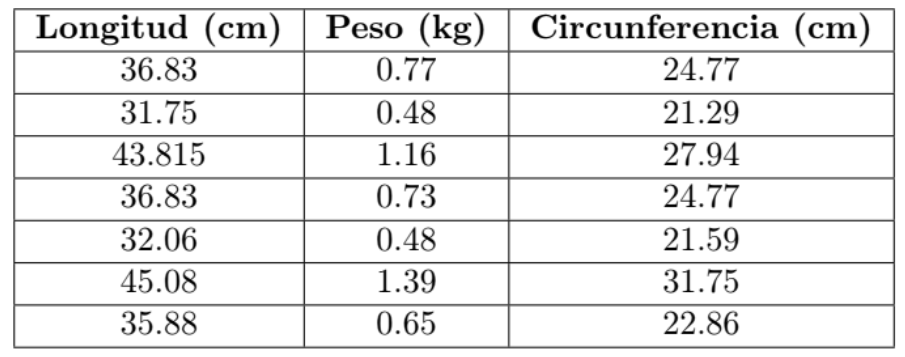


Ahora, agregando los datos de la circunferencia, tengo que ajustar dos parámetros, editando el arreglo params:

params, _ = curve_fit(modelo_con_circunferencia, (longitudes, circunferencias), pesos)
K_opt, a_opt = params


Constante K: 1.118709586899339e-05
Exponente a: 0.08076484094555392


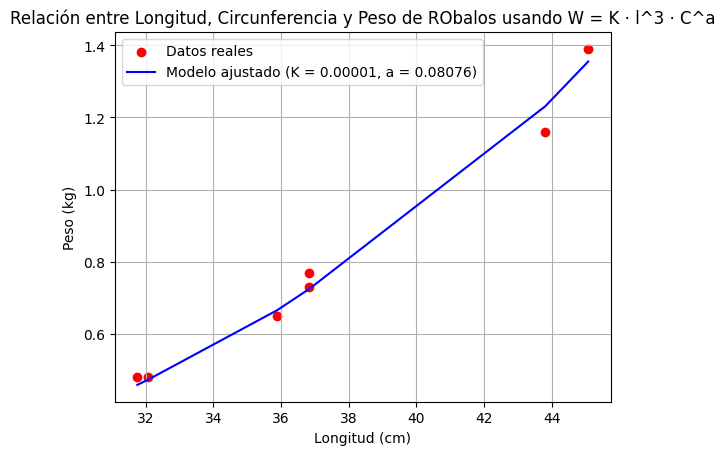

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos de la longitud (l), peso (W) y circunferencia (C) de los robalos
longitudes = np.array([36.83, 31.75, 43.815, 36.83, 32.06, 45.08, 35.88])
pesos = np.array([0.77, 0.48, 1.16, 0.73, 0.48, 1.39, 0.65])
circunferencias = np.array([24.77, 21.29, 27.94, 24.77, 21.59, 31.75, 22.86])

# Definición de la relación W = K * l^3 * C^a
def modelo_con_circunferencia(variables, K, a):
    l, c = variables
    return K * l**3 * c**a

# Ajuste del modelo para encontrar K y a
params, _ = curve_fit(modelo_con_circunferencia, (longitudes, circunferencias), pesos)
K_opt, a_opt = params

print(f"Constante K: {K_opt}")
print(f"Exponente a: {a_opt}")

# Predicción de pesos usando el modelo ajustado
pesos_estimados = modelo_con_circunferencia((longitudes, circunferencias), K_opt, a_opt)

# Gráfica de los datos originales y la estimación del modelo
plt.scatter(longitudes, pesos, color='r', label='Datos reales')

# Orden de los datos para una mejor visualización de la línea ajustada
sorted_indices = np.argsort(longitudes)
longitudes_sorted = longitudes[sorted_indices]
pesos_estimados_sorted = pesos_estimados[sorted_indices]

plt.plot(longitudes_sorted, pesos_estimados_sorted, color='b', label=f'Modelo ajustado (K = {K_opt:.5f}, a = {a_opt:.5f})')
plt.xlabel('Longitud (cm)')
plt.ylabel('Peso (kg)')
plt.title('Relación entre Longitud, Circunferencia y Peso de RObalos usando W = K ⋅ l^3 ⋅ C^a')
plt.legend()
plt.grid(True)
plt.show()



# Ejercicio 2

Para este problema debemos considerar lo siguiente:

1) Toda habitación tiene un costo fijo de mantenimiento de 240 pesos por día. 

2) Si las habitaciones se encuentran a un precio de 2,400 pesos todas se ocuparán en temporada alta.

3) Por cada aumento de 200 pesos en la tarifa diaria se desocupan 2 habitaciones.

4) El ingreso por día debe ser menor a 15,000 pesos.


Podemos ver el costo de las ganancias diarias totales como: 

Ganancias totales igual a la diferencia entre los ingresos por habitación y el costo de mantenimiento multiplicado por el número habitaciones ocupadas.

Gt = (Ih - 240) ⋅ Nh

Gt: Ganancias totales
Ih: Ingresos por habitación
Nh: Número de habitaciones ocupadas.


Precio óptimo sin restricción: 3620.00 pesos
Ganancia máxima sin restricción: 114244.00 pesos
Precio óptimo con restricción: 5000.00 pesos
Ganancia con restricción: 95200.00 pesos


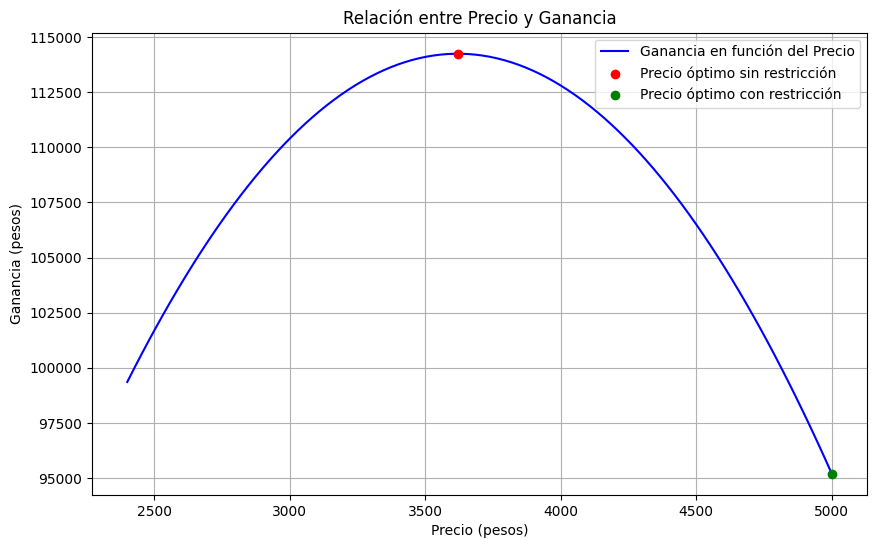

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Definir variables
costo_mantenimiento = 240  
precio_base = 2400         
habitaciones_totales = 60 

# Relación entre precio y ocupación
def ocupacion(P):
    return 70 - P / 100

# Ganancia diaria total
def ganancia(P):
    return (P - costo_mantenimiento) * ocupacion(P)

# Maximización de ganancia sin restricción
resultado = minimize_scalar(lambda P: -ganancia(P), bounds=(2400, 5000), method='bounded')
precio_optimo = resultado.x
ganancia_maxima = ganancia(precio_optimo)

# Precio con restricción fiscal
precio_restringido = minimize_scalar(lambda P: abs(ganancia(P) - 15000), bounds=(2400, 5000), method='bounded')
precio_optimo_restringido = precio_restringido.x
ganancia_restringida = ganancia(precio_optimo_restringido)

# Resultados
print(f"Precio óptimo sin restricción: {precio_optimo:.2f} pesos")
print(f"Ganancia máxima sin restricción: {ganancia_maxima:.2f} pesos")
print(f"Precio óptimo con restricción: {precio_optimo_restringido:.2f} pesos")
print(f"Ganancia con restricción: {ganancia_restringida:.2f} pesos")

# Rango de precios para la gráfica
precios_rango = np.linspace(2400, 5000, 100)
ganancias_rango = ganancia(precios_rango)

# Graficar la ganancia en función del precio
plt.figure(figsize=(10, 6))
plt.plot(precios_rango, ganancias_rango, label='Ganancia en función del Precio', color='blue')
plt.scatter([precio_optimo], [ganancia_maxima], color='red', zorder=5, label='Precio óptimo sin restricción')
plt.scatter([precio_optimo_restringido], [ganancia_restringida], color='green', zorder=5, label='Precio óptimo con restricción')

plt.xlabel('Precio (pesos)')
plt.ylabel('Ganancia (pesos)')
plt.title('Relación entre Precio y Ganancia')
plt.legend()
plt.grid(True)
plt.show()

